In [31]:
import numpy as np
import pandas as pd
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [4]:
df=pd.read_csv("email.csv")

df.head(100)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
95,"Subject: v - shoop hello , welcome to the med...",1
96,Subject: you need only 15 minutes to prepare f...,1
97,Subject: do i require an attorney to use this ...,1
98,Subject: high - quality affordable logos corp...,1


In [5]:
#df.head(10)
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
df.shape

(5683, 2)

In [7]:
df.columns

Index(['text', 'spam'], dtype='object')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5569, 2)

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Sathvika
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def process(text):
    nopunc=[]
    clean_words=[]
    for ch in text:
        if ch not in string.punctuation:
            nopunc.append(ch)
    remove_punc=''.join(nopunc)
    for word in remove_punc.split():
        if word.lower() not in stopwords.words('english'):
            clean_words.append(word)
    return clean_words
    

In [29]:
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=process)
bow_transformer = vectorizer.fit(df['text']) 
messages_bow = bow_transformer.transform(df['text'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size = 0.30, random_state = 0)

In [28]:
messages_bow.shape

(5569, 30514)

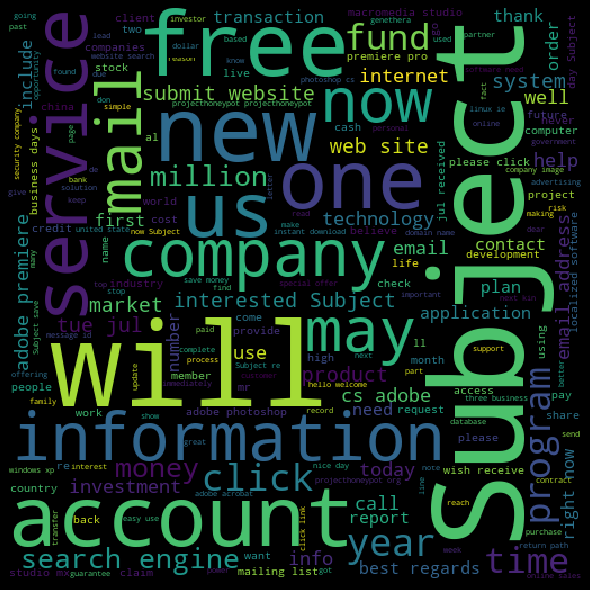

In [32]:
spam_words=' '.join(list(df[df['spam']==1]['text']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

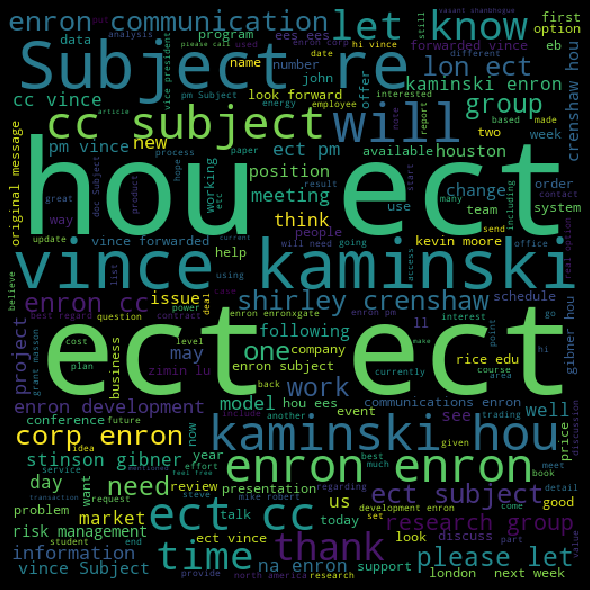

In [34]:
ham_words=' '.join(list(df[df['spam']==0]['text']))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()